In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Uploading dataset

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


# Data analysis

In [3]:
df.shape

(566602, 23)

In [4]:
#to find the datatypes of all columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
#Calculating basic stats related to columns
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
#checking for null values
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
#unique values in dataset
df.apply(lambda x: len(x.unique()))

id                     563201
sex                         2
patient_type                2
entry_date                181
date_symptoms             181
date_died                 124
intubed                     4
pneumonia                   3
age                       120
pregnancy                   4
diabetes                    3
copd                        3
asthma                      3
inmsupr                     3
hypertension                3
other_disease               3
cardiovascular              3
obesity                     3
renal_chronic               3
tobacco                     3
contact_other_covid         3
covid_res                   3
icu                         4
dtype: int64

# Feature description
id - The identification number of the patient.

sex - Identifies the sex of the patient. (Female - 1, Male - 2)

patient_type - Identifies the type of care received by the patient in the unit. It is called an outpatient if you returned home or it is called an inpatient if you were admitted to hospital. (Outpatient - 1, Inpatient - 2)

entry_date - Identifies the date of the patient's admission to the care unit.

date_symptoms - Identifies the date on which the patient's symptoms began.

date_died - Identifies the date the patient died. (“9999-99-99” stands for recovered)

intubed - Identifies if the patient required intubation. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

pneumonia - Identifies if the patient was diagnosed with pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

age - Identifies the age of the patient.

pregnancy - Identifies if the patient is pregnant. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

diabetes - Identifies if the patient has a diagnosis of diabetes. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

copd - Identifies if the patient has a diagnosis of Chronic obstructive pulmonary disease (COPD). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

asthma - Identifies if the patient has a diagnosis of asthma. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

inmsupr - Identifies if the patient has immunosuppression (weakened immune system). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

hypertension - Identifies if the patient has a diagnosis of hypertension. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

other_disease - Identifies if the patient has a diagnosis of other diseases. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

cardiovascular - Identifies if the patient has a diagnosis of cardiovascular disease. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

obesity - Identifies if the patient is diagnosed with obesity. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

renal_chronic - Identifies if the patient has a diagnosis of chronic kidney failure. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

tobacco - Identifies if the patient is a tobacco user. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

contact_other_covid - Identifies if the patient had contact with other Covid19 patient. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

covid_res - The result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)

icu - Identifies if the patient required to enter an Intensive Care Unit. (Yes - 1, No - 2, Data missing or NA - 97,98,99)


In [8]:
df.drop(columns={'entry_date','date_died','date_symptoms','id'},axis=1,inplace=True)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Preprocessing Data

<AxesSubplot:>

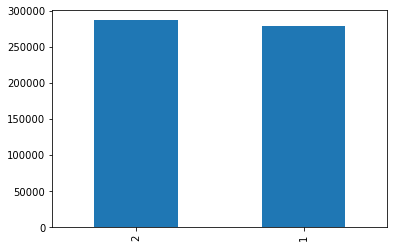

In [9]:
#converting the feature encoding in binary number
df["sex"].value_counts().plot.bar()

In [10]:
# Replace result of the test to (Negative - 0, Positive - 1, Awaiting Results - 2)
df['covid_res'].replace([2,3],[0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


In [11]:
df=df[df['covid_res']!=2]


Text(0.5, 1.0, 'covid_res')

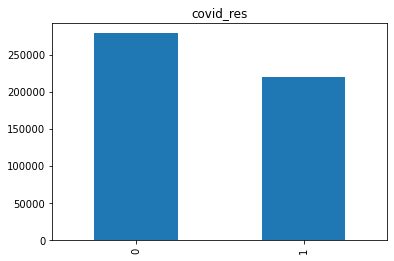

In [12]:
df['covid_res'].value_counts().sort_index().plot.bar()
plt.title('covid_res')

In [13]:
lst=df.columns
for i in range(19):
    print(df[lst[i]].value_counts().to_frame())
    print("----------------")

      sex
2  253098
1  246594
----------------
   patient_type
1        392146
2        107546
----------------
    intubed
97   392146
2     98321
1      9103
99      122
----------------
    pneumonia
2      420965
1       78716
99         11
----------------
       age
30   12872
31   12298
36   12292
38   12259
37   12248
..     ...
115      1
111      1
107      1
118      1
105      1

[120 rows x 1 columns]
----------------
    pregnancy
97     253098
2      241644
1        3614
98       1336
----------------
    diabetes
2     435702
1      62349
98      1641
----------------
      copd
2   489970
1     8276
98    1446
----------------
    asthma
2   482036
1    16214
98    1442
----------------
    inmsupr
2    489959
1      8071
98     1662
----------------
    hypertension
2         416863
1          81340
98          1489
----------------
    other_disease
2          482107
1           15392
98           2193
----------------
    cardiovascular
2           486764
1         

In [14]:
# Convert yes(1) and no(2) values into yes(1) and no(0)
columns = ['intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu']

#convert no(2) values into no(0)
binary_columns = df[columns].replace(2,0).replace([97,98,99],2)

#dropping the original columns
df2 = df.drop(columns,axis=1)

df2[columns] = binary_columns
df2.reindex(columns=list(df2.columns)).head()


,sex,patient_type,age,covid_res,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,2,1,27,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2
1,2,1,24,1,2,0,2,0,0,0,0,0,0,0,0,0,0,2,2
2,1,2,54,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
3,2,2,30,1,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0
4,1,2,60,1,0,0,0,1,0,0,0,1,0,1,0,0,0,2,0


In [15]:
df2

,sex,patient_type,age,covid_res,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,2,1,27,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2
1,2,1,24,1,2,0,2,0,0,0,0,0,0,0,0,0,0,2,2
2,1,2,54,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
3,2,2,30,1,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0
4,1,2,60,1,0,0,0,1,0,0,0,1,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,2,1,77,0,2,1,2,0,0,0,0,0,1,0,0,0,1,0,2
499688,2,2,63,0,1,1,2,0,0,0,0,1,0,0,1,0,1,0,0
499689,1,1,25,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
499690,1,1,45,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,2


In [16]:
df2.shape

(499692, 19)

###### After encoding the data into binary number i.e [0,1] and converting all the missing i.e [97,98,99] into 2.We have neglected the missing values and plotted a bar chart of each column.
##### 0- No
##### 1-Yes
##### except for sex and patient type, 
##### for sex, 1=Female and 2= Male
##### for patient type, 1=outpatient and 2=inpatient


In [17]:
lst=df2.columns
for i in range(19):
    print(df2[lst[i]].value_counts().to_frame())
    print("=====================")

      sex
2  253098
1  246594
   patient_type
1        392146
2        107546
       age
30   12872
31   12298
36   12292
38   12259
37   12248
..     ...
115      1
111      1
107      1
118      1
105      1

[120 rows x 1 columns]
   covid_res
0     279035
1     220657
   intubed
2   392268
0    98321
1     9103
   pneumonia
0     420965
1      78716
2         11
   pregnancy
2     254434
0     241644
1       3614
   diabetes
0    435702
1     62349
2      1641
     copd
0  489970
1    8276
2    1446
   asthma
0  482036
1   16214
2    1442
   inmsupr
0   489959
1     8071
2     1662
   hypertension
0        416863
1         81340
2          1489
   other_disease
0         482107
1          15392
2           2193
   cardiovascular
0          486764
1           11419
2            1509
   obesity
0   416293
1    81929
2     1470
   renal_chronic
0         488197
1          10019
2           1476
   tobacco
0   455158
1    42955
2     1579
   contact_other_covid
1               196966
2

Text(0.5, 1.0, 'Intubed')

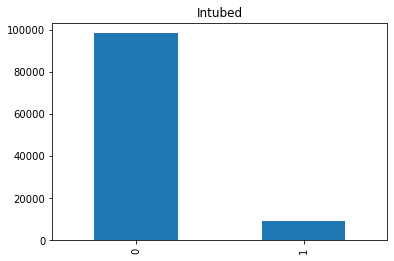

In [18]:
df2=df2[df2['intubed']!=2]
df2['intubed'].value_counts().sort_index().plot.bar()
df2['intubed'].value_counts().to_frame()
plt.title('Intubed')

In [19]:
df2=df2[df2['intubed']!=2]
df2['intubed'].value_counts().to_frame()

,intubed
0,98321
1,9103


Text(0.5, 1.0, 'Pneumonia')

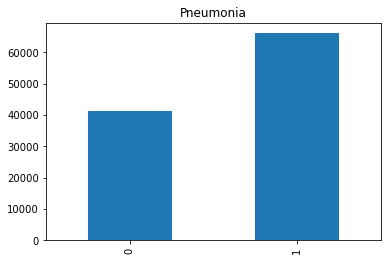

In [20]:
df2=df2[df2['pneumonia']!=2]
df2['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('Pneumonia')

In [21]:
df2=df2[df2['pneumonia']!=2]
df2['pneumonia'].value_counts().to_frame()

,pneumonia
1,66080
0,41344


Text(0.5, 1.0, 'Pregnancy')

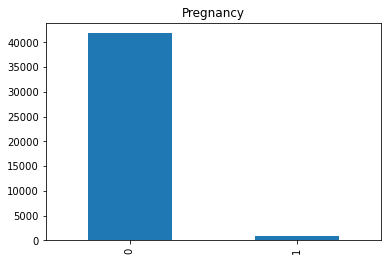

In [22]:
df2=df2[df2['pregnancy']!=2]
df2['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

In [23]:
df2=df2[df2['pregnancy']!=2]
df2['pregnancy'].value_counts().to_frame()

,pregnancy
0,41821
1,969


Text(0.5, 1.0, 'Diabetes')

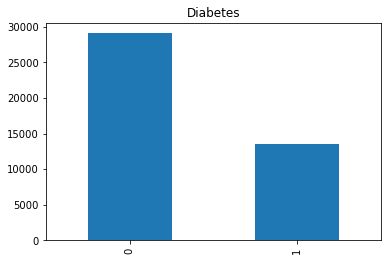

In [24]:
df2=df2[df2['diabetes']!=2]
df2['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

In [25]:
df2=df2[df2['diabetes']!=2]
df2['diabetes'].value_counts().to_frame()

,diabetes
0,29094
1,13502


Text(0.5, 1.0, 'Copd')

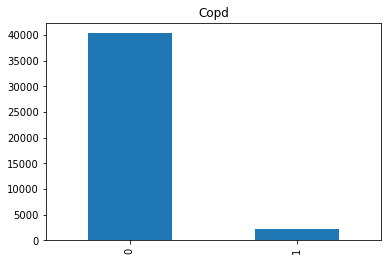

In [26]:
df2=df2[df2['copd']!=2]
df2['copd'].value_counts().sort_index().plot.bar()
plt.title('Copd')

In [27]:
df2=df2[df2['copd']!=2]
df2['copd'].value_counts().to_frame()

,copd
0,40307
1,2267


Text(0.5, 1.0, 'Asthma')

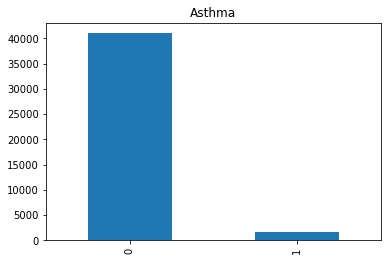

In [28]:
df2=df2[df2['asthma']!=2]
df2['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

In [29]:
df2=df2[df2['asthma']!=2]
df2['asthma'].value_counts().to_frame()

,asthma
0,40988
1,1578


Text(0.5, 1.0, 'Inmsupr')

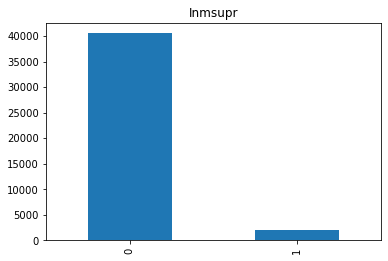

In [30]:
df2=df2[df2['inmsupr']!=2]
df2['inmsupr'].value_counts().sort_index().plot.bar()
plt.title('Inmsupr')

In [31]:
df2=df2[df2['inmsupr']!=2]
df2['inmsupr'].value_counts().to_frame()

,inmsupr
0,40541
1,1983


Text(0.5, 1.0, 'Hypertension')

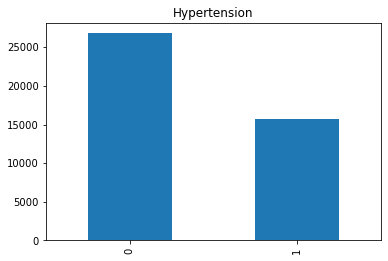

In [32]:
df2=df2[df2['hypertension']!=2]
df2['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hypertension')

In [33]:
df2=df2[df2['hypertension']!=2]
df2['hypertension'].value_counts().to_frame()

,hypertension
0,26800
1,15713


Text(0.5, 1.0, 'Other_disease')

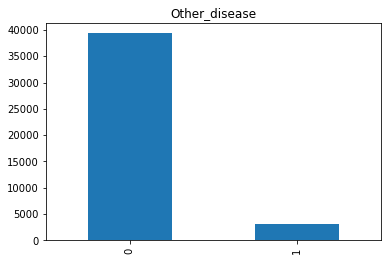

In [34]:
df2=df2[df2['other_disease']!=2]
df2['other_disease'].value_counts().sort_index().plot.bar()
plt.title('Other_disease')

In [35]:
df2=df2[df2['other_disease']!=2]
df2['other_disease'].value_counts().to_frame()

,other_disease
0,39342
1,3044


Text(0.5, 1.0, 'Cardiovascular')

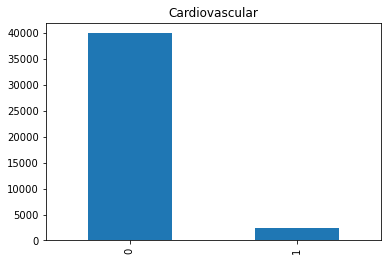

In [36]:
df2=df2[df2['cardiovascular']!=2]
df2['cardiovascular'].value_counts().sort_index().plot.bar()
plt.title('Cardiovascular')

In [37]:
df2=df2[df2['cardiovascular']!=2]
df2['cardiovascular'].value_counts().to_frame()

,cardiovascular
0,39973
1,2402


Text(0.5, 1.0, 'Obesity')

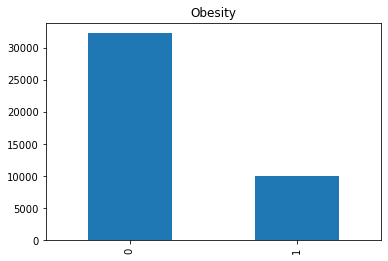

In [38]:
df2=df2[df2['obesity']!=2]
df2['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesity')

In [39]:
df2=df2[df2['obesity']!=2]
df2['obesity'].value_counts().to_frame()

,obesity
0,32311
1,10013


Text(0.5, 1.0, 'Renal Chronic')

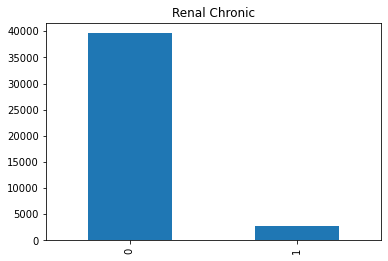

In [40]:
df2=df2[df2['renal_chronic']!=2]
df2['renal_chronic'].value_counts().sort_index().plot.bar()
plt.title('Renal Chronic')

In [41]:
df2=df2[df2['renal_chronic']!=2]
df2['renal_chronic'].value_counts().to_frame()

,renal_chronic
0,39607
1,2706


Text(0.5, 1.0, 'Tobacco')

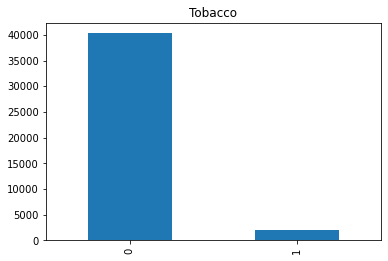

In [42]:
df2=df2[df2['tobacco']!=2]
df2['tobacco'].value_counts().sort_index().plot.bar()
plt.title('Tobacco')

In [43]:
df2=df2[df2['tobacco']!=2]
df2['tobacco'].value_counts().to_frame()

,tobacco
0,40303
1,1988


Text(0.5, 1.0, 'Contact other covid')

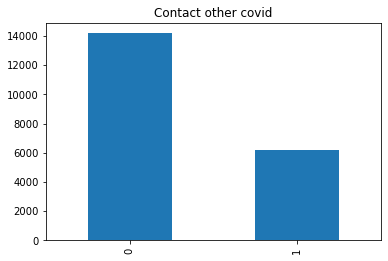

In [44]:
df2=df2[df2['contact_other_covid']!=2]
df2['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contact other covid')

In [45]:
df2=df2[df2['contact_other_covid']!=2]
df2['contact_other_covid'].value_counts().to_frame()

,contact_other_covid
0,14174
1,6178


Text(0.5, 1.0, 'Icu')

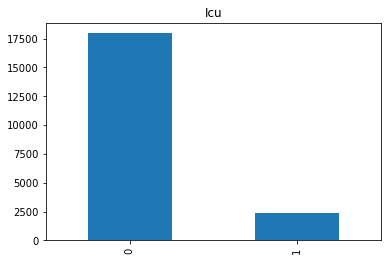

In [46]:
df2=df2[df2['icu']!=2]
df2['icu'].value_counts().sort_index().plot.bar()
plt.title('Icu')

In [47]:
df2=df2[df2['icu']!=2]
df2['icu'].value_counts().to_frame()

,icu
0,17961
1,2391


In [48]:
# As we have removed unwanted rows, now we'll reset index
df2.reset_index(drop=True,inplace=True)
df2.head(10)

,sex,patient_type,age,covid_res,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,1,2,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2,52,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,1,2,51,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2,67,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,1,2,59,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
5,1,2,52,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
6,1,2,54,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,2,78,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1
8,1,2,80,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
9,1,2,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df2.corr()

,sex,patient_type,age,covid_res,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,1.000000,0.202211,0.052129,0.231756,-0.174889,0.311785,0.206137,-0.019301,-0.050585,0.415484,-0.039407,0.139180,0.106215,0.075726,0.025242,-0.086659,-0.007049
covid_res,NaN,NaN,0.202211,1.000000,0.053427,0.205502,-0.046104,0.083567,-0.045160,-0.010103,-0.083115,0.079742,-0.094249,-0.046820,0.114613,-0.058039,-0.028987,0.041890,0.014981
intubed,NaN,NaN,0.052129,0.053427,1.000000,0.186987,-0.034691,0.062194,0.026414,-0.021660,0.009933,0.055087,0.040659,0.023542,0.049560,0.041501,-0.001439,-0.041755,0.426606
pneumonia,NaN,NaN,0.231756,0.205502,0.186987,1.000000,-0.102353,0.140891,0.036701,-0.020121,-0.010377,0.146803,-0.007317,0.032746,0.107259,0.041349,0.003547,-0.097163,0.115182
pregnancy,NaN,NaN,-0.174889,-0.046104,-0.034691,-0.102353,1.000000,-0.085143,-0.032800,0.006560,-0.025374,-0.094615,0.014522,-0.028802,-0.035482,-0.030326,-0.014847,-0.045022,-0.014158
diabetes,NaN,NaN,0.311785,0.083567,0.062194,0.140891,-0.085143,1.000000,0.075233,0.005331,-0.013156,0.375516,-0.010000,0.102122,0.122252,0.159729,0.015924,-0.090014,0.032156
copd,NaN,NaN,0.206137,-0.045160,0.026414,0.036701,-0.032800,0.075233,1.000000,0.053234,0.030627,0.125038,0.022135,0.120946,0.044650,0.048668,0.089287,-0.045629,0.004155
asthma,NaN,NaN,-0.019301,-0.010103,-0.021660,-0.020121,0.006560,0.005331,0.053234,1.000000,0.027347,0.015617,0.002617,0.011809,0.050402,-0.007349,0.028560,-0.000215,-0.009605


<AxesSubplot:>

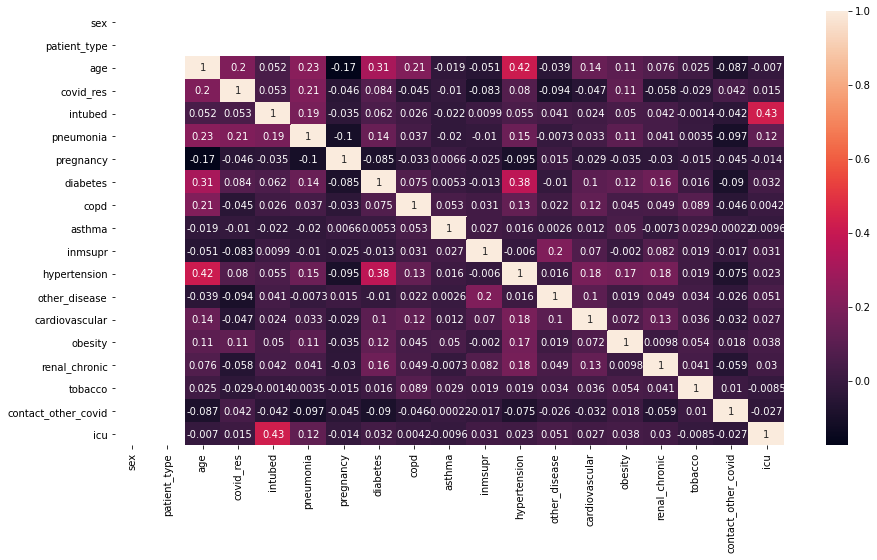

In [52]:
corr=df2.corr()
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr,annot=True,ax=ax)

The dataset shows the correlation of maximum 42% among the features, which is quite low and we can consider each separately. Without dropping any columns, we will further proceed to training and testing data

## Splitting Data Into Training and Testing

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. We will use 70% of data Training data and the rest 30% as Tesing data.

In [53]:
from sklearn.model_selection import train_test_split
#train - 70%
#test - 30%
X=df2.drop(columns=['covid_res'])
Y=df2['covid_res']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

## Random Forest Algorithm

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_predict = rfc.predict(x_test)
randomForest_score = metrics.accuracy_score(y_test, y_predict)
print("Random Forest Score :",randomForest_score)





Random Forest Score : 0.6175892564690468


In [55]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.56      0.48      0.51      2597
           1       0.65      0.72      0.68      3509

    accuracy                           0.62      6106
   macro avg       0.60      0.60      0.60      6106
weighted avg       0.61      0.62      0.61      6106



#### This model has an accuracy score of 62% on the test data. That doesnt seem pretty impressive, but accuracy is not a great measure of classifier performance when the classes are imbalanced. We need more information to understand how well the model really performed. Did it perform equally well for each class?

In [56]:
y_test.shape

(6106,)

## Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
conf_matrix = confusion_matrix(y_test,y_predict)
print ( conf_matrix)

[[1234 1363]
 [ 972 2537]]


Text(0.5, 1.0, 'CONFUSION MATRIX')

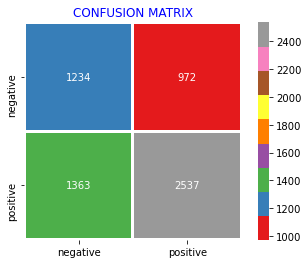

In [59]:
conf_matrix = confusion_matrix(y_predict,y_test)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
            xticklabels=["negative","positive"],
            yticklabels=["negative","positive"],linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("CONFUSION MATRIX",color = "b")

#### As the confusion matrix show the performance of the model. We see that a large number of True negative score have been attained which is not desireable for us. And we cannot fully rely on this model

## ROC Curve

Area under curve :  0.5990808277477366


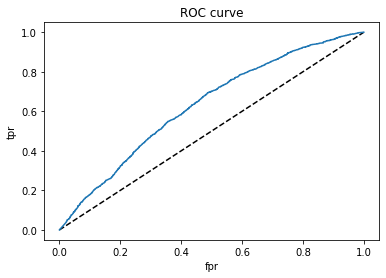

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer
model_roc_auc = roc_auc_score(y_test,y_predict) 
y_pred_proba = rfc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

# THANKYOU!